# Піксельні операції

## Завдання

Можна використовувати бібліотеку **PIL** або бібліотеку  **openCV**.

1. Створіть функцію для зчитування зображення з диску та його відображення на екрані.

2. Створіть функцію для збереження зображення на диск.

3. Створіть функцію для реалізації наступних піксельних операцій:

 - зміна контрасності (задання коефіцієнту контрастності та яскравості);
 - зміна яскравості (задання коефіцієнту яскравості);
 - зміна насиченості (задання коефіцієнту насиченості);
 - зміна розміру зображення (задання нової ширини та висоти);
 - обізання зображення (задання координат початку та кінця обрізання);
 - поворот зображення на заданий кут (задання кута повороту в градусах).

## Розв'язок

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 1. Функція для зчитування зображення з диску та його відображення на екрані.

In [2]:
# Функція для зчитування зображення
def load(file):
    img = cv2.imread(file, cv2.IMREAD_COLOR)
    return img

# Функція для зчитування зображення в RGB
def load_RGB(file):
    img = cv2.imread(file, cv2.IMREAD_COLOR)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img_RGB

In [3]:
# Функція для відображення зображення на екрані
def show(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show

def show_RGB(img_RGB):
    plt.imshow(img_RGB)
    plt.axis('off')
    plt.show

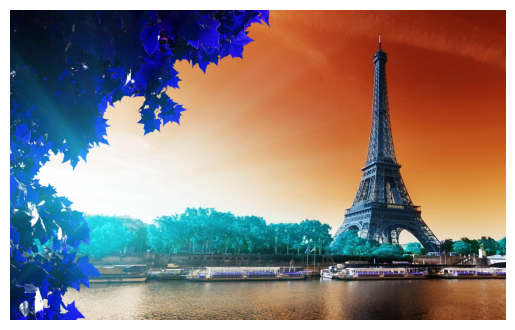

In [4]:
image = load('eifel.jpg')
show(image)
#show(load('eifel.jpg'))

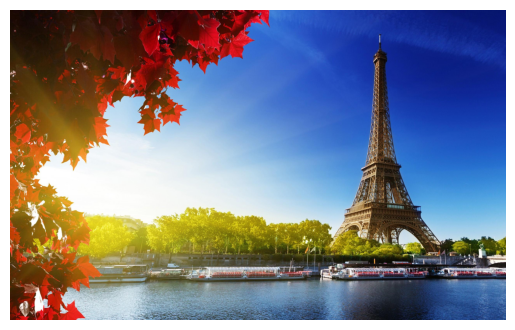

In [5]:
image_RGB = load_RGB('eifel.jpg')
show_RGB(image_RGB)

#show_RGB(load_RGB('eifel.jpg'))

### 2. Функція для збереження зображення на диск.

In [6]:
# Функція запису зображення на диск

def save_file(img):
    cv2.imwrite(file_name, img)   

In [7]:
# Зберігаємо файл на диск
file_name = 'Image/eifel_.jpg'

save_file(load('eifel.jpg'))

### 3. Функції для реалізації наступних піксельних операцій:

### 3.1.1. Автоконтраст

In [8]:
def auto_contrast(img):
    clahe = cv2.createCLAHE(clipLimit=3., tileGridSize=(8,8)) # CLAHE (Contrast Limited Adaptive Histogram Equalization)
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)                # convert from BGR to LAB color space
    l, a, b = cv2.split(lab)                                  # split on 3 different channels
    l2 = clahe.apply(l)                                       # apply CLAHE to the L-channel
    lab = cv2.merge((l2,a,b))                                 # merge channels
    return cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)               # convert from LAB to RGB

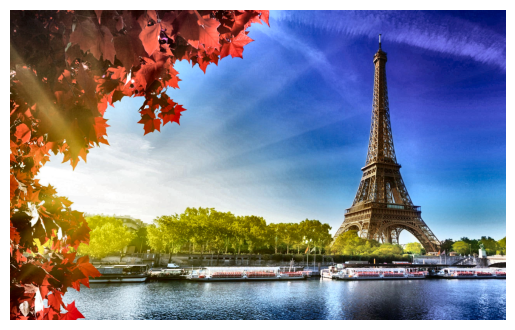

In [9]:
image1_auto_contrast = auto_contrast(load('eifel.jpg'))

show(image1_auto_contrast)

file_name = 'Image/eifel_auto_contrast.jpg'

save_file(image1_auto_contrast)


###  3.1.2. Зміна контрастності (задания коефіцієнту контрастності та яскравості)

In [10]:
def change_contrast(img, alpha, beta):
    # Змінюємо контраст
    new_image = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    return new_image
# коефіцієнт контрастності (alpha) та значення яскравості (beta). 
# Коефіцієнт контрастності може бути значенням від 0.0 до будь-якого числа, яке вибирається користувачем, 
# а значення яскравості може бути значенням від 0 до 100, яке вибирається користувачем.


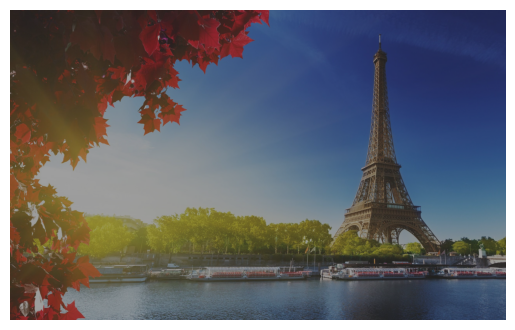

In [11]:
img = load_RGB('eifel.jpg')
image_contr = change_contrast(img, 0.5, 30)


show(image_contr)
# plt.imshow(eifel_contr)
# plt.axis('off')
# plt.show

file_name = 'Image/eifel_contrast.jpg'

save_file(image_contr)

### 3.2. Зміна яскравості (задания коефіцієнту яскравості)

In [12]:
def change_brightness(img, value):
    # Змінюємо яскравість
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v += value
    final_hsv = cv2.merge((h, s, v))
    new_image = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2RGB)
    return new_image

# Значення яскравості може бути значенням від -255 до 255, 
# де значення більше 0 збільшує яскравість, а значення менше 0 зменшує.

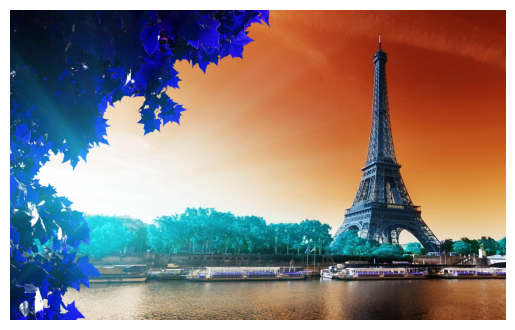

In [13]:
image_brightness = load('eifel.jpg')
change_brightness(image_brightness, 200)
# plt.imshow(image_brightness)
# plt.axis('off')
# plt.show

show(image_brightness)
file_name = 'Image/eifel_brightness.jpg'

save_file(image_brightness)

## 3.3. Зміна насиченості (задания коефіцієнту насиченості)

In [14]:
def change_saturation(img):
    x = 5
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)   # Конвертуємо зображення з формату BGR в HSV
    hsv_img[:, :, 1] = hsv_img[:, :, 1] * x          # Збільшуємо / зменшуємо насиченість
    satur = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)  # Перетворюємо зображення з формату HSV в RGB
    return satur

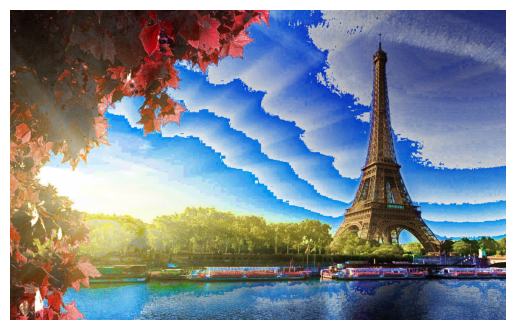

In [15]:
image_saturation = change_saturation(load('eifel.jpg'))
# plt.imshow(image_saturation)
# plt.axis('off')
# plt.show

show(image_saturation)
file_name = 'Image/eifel_saturation.jpg'
save_file(image_saturation)

## 3.4. Зміна розміру зображення (задания нової ширини та висоти)

In [16]:
def resize_image(img, width, height):
    resized_img = cv2.resize(img, (width, height))
    return resized_img

In [17]:
im = load('eifel.jpg')
print(f'розмір зображення {im.shape[0]} x {im.shape[1]}')

розмір зображення 1600 x 2560


In [18]:
image_resized = resize_image(im, 1600, 1200)
print(f'розмір зображення {image_resized.shape[0]} x {image_resized.shape[1]}')

розмір зображення 1200 x 1600


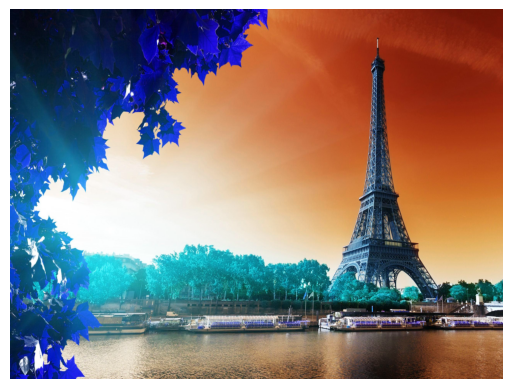

In [19]:
show(image_resized)
file_name = 'Image/eifel_resized.jpg'
save_file(image_resized)

# plt.imshow(image_resized)
# plt.axis('off')
# plt.show;

## 3.5. Обрізання зображення (задания координат початку та кінця обрізання)

In [20]:
#  Функція обрізання зображення
def crop_image(img, x1, y1, x2, y2):
    return img[x1:x2,y1:y2]

In [21]:
im = load('eifel.jpg')
im.shape

(1600, 2560, 3)

In [22]:
im = load_RGB('eifel.jpg')
im_cropped = crop_image(im, 200, 200, 1500, 1500)
im_cropped.shape

(1300, 1300, 3)

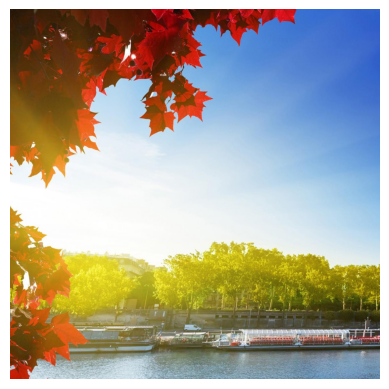

In [23]:
# plt.imshow(im_cropped)
# plt.axis('off')
# plt.show;

show(im_cropped)
file_name = 'Image/eifel_cropped.jpg'
save_file(im_cropped)

## 3.6. Поворот зображення на заданий кут (задания кута повороту в градусах)

In [24]:
def rotate_image(img, angle):
    # Отримуємо висоту та ширину зображення
    (h, w) = img.shape[:2]
    # Обчислюємо центр зображення
    center = (w / 2, h / 2)
    # Обчислюємо матрицю перетворення та повертаємо зображення
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_img = cv2.warpAffine(img, M, (w, h))
    return rotated_img

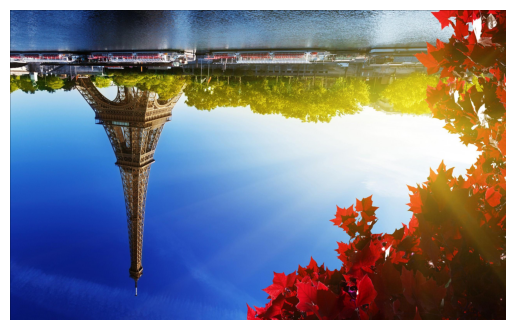

In [25]:

img_rotated = rotate_image(load_RGB('eifel.jpg'), 180)

show(img_rotated)
file_name = 'Image/eifel_rotated.jpg'
save_file(img_rotated)